# DBSCAN realisation

In [1]:
import random
import pandas as pd
import pylab as pl
import numpy as np
import scipy.spatial as ss
import sklearn.cluster as sc
import sklearn.manifold as sm
import sklearn.datasets as ds
import sklearn.metrics as smt

import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['figure.figsize'] = (12, 8)


In [2]:
from sklearn.base import BaseEstimator, ClusterMixin
from itertools import cycle
from math import hypot


# возврат массива индексов ближайших соседей для точки из множества с заданным расстоянием
def region_query(p, eps, data):
    return [idx for idx, q in enumerate(data) if np.linalg.norm(p - q) < eps]

class Clustering(BaseEstimator, ClusterMixin):
        
    def __init__(self, eps=0.5, min_samples=3):

        self.eps = eps
        self.min_samples = min_samples
        
    def fit(self, x, y=None):

        labels = np.zeros(len(x))

        NOISE = 0
        C = 0

        for idx, p in enumerate(x):
            if labels[idx] != 0:
                continue
            neighbours = region_query(p, self.eps, x)
            if len(neighbours) >= self.min_samples:
                C += 1
                labels[idx] = C
                for i in neighbours:
                    if labels[i] != 0:
                        continue
                    labels[i] = C
                    border = region_query(x[i], self.eps, x)
                    if len(border) >= self.min_samples:
                        neighbours += border
        self.labels = labels
        return self


    def fit_predict(self, x, y=None):
        self.fit(x, y)
        return self.labels

***Кластеризация на датасете `iris` из библиотеки `sklearn`***

In [4]:
pred_iris = Clustering(eps=0.65, min_samples=3).fit_predict(x_iris)
print("Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris))

Adjusted Rand index for iris is: 1.00


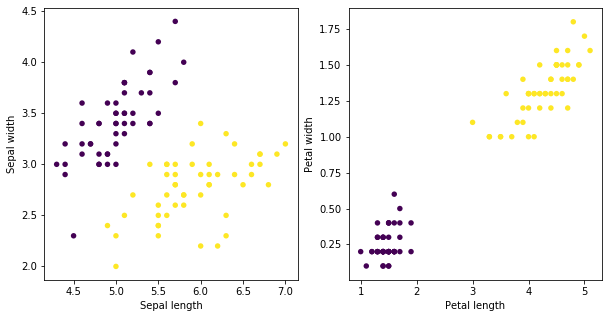

In [5]:
# Graph for self-written algorithm

pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=pred_iris, cmap='viridis', lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=pred_iris, cmap='viridis', lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()